## Feladat: 
Többváltozós Lineáris Regresszió segítségével hozz létre egy modellt és tippeld meg a jatt mennyiséget, amit a az emberek adni fognak miután ettek. 
A datasettben kell tisztítani és átalakítani is. A datasettet a datasets/ részben találod

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sb
import sklearn as sk

In [2]:
diner_dataset = "../datasets/diners_monthly_bills.csv"
df = pd.read_csv(diner_dataset)
df

,total_bill,tip,sex,smoker,day,time,size
0,$28.61,3.43,Male,No,Thu,Lunch,2
1,29.23,$4.73,Male,No,Sun,Dinner,2
2,71.95,12.54,Female,Yes,Sat,Dinner,5
3,$26.45,$4.6,Female,No,Fri,Dinner,2
4,$25.01,3.81,Female,No,Tue,Lunch,2
...,...,...,...,...,...,...,...
495,$40.8,6.64,Female,No,Thu,Lunch,3
496,$42.75,$7.48,Female,No,Fri,Dinner,3
497,$70.9,$8.17,Male,Yes,Mon,Lunch,5
498,79.14,11.54,Male,Yes,Sun,Dinner,6


## Adat tisztítás és átalakítás
Megtisztítjuk és átalakítjuk az adatokat, hogy a többváltozós lineáris regressziós mdoellt létre tudjuk hozni

# 1. "$" eltüntetése total_bills és tip oszlopokból

In [3]:
df.dtypes

total_bill    object
tip           object
sex           object
smoker        object
day           object
time          object
size           int64
dtype: object

In [5]:
sr_total_bill = df["total_bill"]
sr_total_bill.unique()

array(['$28.61', '29.23', '71.95', '$26.45', '$25.01', '$50.49', '$37.54',
       '63.34', '28.97', '24.0', '14.64', '$26.97', '64.77', '24.06',
       '47.43', '46.11', '22.14', '$70.09', '10.57', '$38.2', '$68.6',
       '$45.47', '$76.91', '28.57', '44.44', '28.58', '45.59', '84.48',
       '$30.0', '$59.54', '31.94', '44.31', '41.64', '$94.05', '$38.8',
       '21.59', '$25.18', '$22.28', '22.62', '$25.28', '55.09', '$36.69',
       '$24.8', '$27.07', '65.02', '$43.83', '29.3', '$61.38', '26.94',
       '$22.19', '33.23', '31.95', '30.15', '$62.58', '$49.35', '$32.0',
       '43.77', '29.71', '52.6', '$41.08', '$32.8', '$29.18', '32.0',
       '40.38', '35.0', '$64.39', '27.05', '23.54', '$30.04', '21.13',
       '56.76', '42.79', '31.3', '$90.0', '$69.91', '58.64', '$25.87',
       '25.73', '67.58', '47.91', '11.69', '$26.76', '$32.83', '$79.01',
       '39.0', '$38.93', '$24.36', '53.55', '60.25', '$21.66', '$45.42',
       '73.44', '$19.27', '$32.86', '$23.62', '60.74', '$40.97'

In [6]:
for i in range(0, len(sr_total_bill) -1):
    old_amount = sr_total_bill[i]
    try:
        new_amount = old_amount.replace("$", "")
        df["total_bill"][i] = new_amount
    except ValueError:
        continue
df

C:\Users\User\AppData\Local\Temp\ipykernel_5872\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\Users\User\AppData\Local\Temp\ipykernel_5872\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\Users\User\AppData\Local\Temp\ipykernel_5872\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\Users\U

,total_bill,tip,sex,smoker,day,time,size
0,28.61,3.43,Male,No,Thu,Lunch,2
1,29.23,$4.73,Male,No,Sun,Dinner,2
2,71.95,12.54,Female,Yes,Sat,Dinner,5
3,26.45,$4.6,Female,No,Fri,Dinner,2
4,25.01,3.81,Female,No,Tue,Lunch,2
...,...,...,...,...,...,...,...
495,40.8,6.64,Female,No,Thu,Lunch,3
496,42.75,$7.48,Female,No,Fri,Dinner,3
497,70.9,$8.17,Male,Yes,Mon,Lunch,5
498,79.14,11.54,Male,Yes,Sun,Dinner,6


In [7]:
sr_tips = df["tip"]
for i in range(0, len(sr_tips) -1):
    old_amount = sr_tips[i]
    try:
        new_amount = old_amount.replace("$", "")
        df["tip"][i] = new_amount
    except ValueError:
        continue
df

C:\Users\User\AppData\Local\Temp\ipykernel_5872\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\User\AppData\Local\Temp\ipykernel_5872\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\User\AppData\Local\Temp\ipykernel_5872\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\User\AppData\Local\

,total_bill,tip,sex,smoker,day,time,size
0,28.61,3.43,Male,No,Thu,Lunch,2
1,29.23,4.73,Male,No,Sun,Dinner,2
2,71.95,12.54,Female,Yes,Sat,Dinner,5
3,26.45,4.6,Female,No,Fri,Dinner,2
4,25.01,3.81,Female,No,Tue,Lunch,2
...,...,...,...,...,...,...,...
495,40.8,6.64,Female,No,Thu,Lunch,3
496,42.75,7.48,Female,No,Fri,Dinner,3
497,70.9,8.17,Male,Yes,Mon,Lunch,5
498,79.14,11.54,Male,Yes,Sun,Dinner,6


In [8]:
df_encoded = pd.get_dummies(df,columns=["sex"], drop_first=True)
df_encoded

,total_bill,tip,smoker,day,time,size,sex_Male
0,28.61,3.43,No,Thu,Lunch,2,True
1,29.23,4.73,No,Sun,Dinner,2,True
2,71.95,12.54,Yes,Sat,Dinner,5,False
3,26.45,4.6,No,Fri,Dinner,2,False
4,25.01,3.81,No,Tue,Lunch,2,False
...,...,...,...,...,...,...,...
495,40.8,6.64,No,Thu,Lunch,3,False
496,42.75,7.48,No,Fri,Dinner,3,False
497,70.9,8.17,Yes,Mon,Lunch,5,True
498,79.14,11.54,Yes,Sun,Dinner,6,True


In [9]:
df_encoded["sex_Male"] = df_encoded["sex_Male"].astype(int)
df_encoded

,total_bill,tip,smoker,day,time,size,sex_Male
0,28.61,3.43,No,Thu,Lunch,2,1
1,29.23,4.73,No,Sun,Dinner,2,1
2,71.95,12.54,Yes,Sat,Dinner,5,0
3,26.45,4.6,No,Fri,Dinner,2,0
4,25.01,3.81,No,Tue,Lunch,2,0
...,...,...,...,...,...,...,...
495,40.8,6.64,No,Thu,Lunch,3,0
496,42.75,7.48,No,Fri,Dinner,3,0
497,70.9,8.17,Yes,Mon,Lunch,5,1
498,79.14,11.54,Yes,Sun,Dinner,6,1


In [10]:
df_encoded = pd.get_dummies(df_encoded, columns=["smoker"], drop_first=True)
df_encoded

,total_bill,tip,day,time,size,sex_Male,smoker_Yes
0,28.61,3.43,Thu,Lunch,2,1,False
1,29.23,4.73,Sun,Dinner,2,1,False
2,71.95,12.54,Sat,Dinner,5,0,True
3,26.45,4.6,Fri,Dinner,2,0,False
4,25.01,3.81,Tue,Lunch,2,0,False
...,...,...,...,...,...,...,...
495,40.8,6.64,Thu,Lunch,3,0,False
496,42.75,7.48,Fri,Dinner,3,0,False
497,70.9,8.17,Mon,Lunch,5,1,True
498,79.14,11.54,Sun,Dinner,6,1,True


In [11]:
df_encoded["smoker_Yes"] = df_encoded["smoker_Yes"].astype(int)
df_encoded

,total_bill,tip,day,time,size,sex_Male,smoker_Yes
0,28.61,3.43,Thu,Lunch,2,1,0
1,29.23,4.73,Sun,Dinner,2,1,0
2,71.95,12.54,Sat,Dinner,5,0,1
3,26.45,4.6,Fri,Dinner,2,0,0
4,25.01,3.81,Tue,Lunch,2,0,0
...,...,...,...,...,...,...,...
495,40.8,6.64,Thu,Lunch,3,0,0
496,42.75,7.48,Fri,Dinner,3,0,0
497,70.9,8.17,Mon,Lunch,5,1,1
498,79.14,11.54,Sun,Dinner,6,1,1


In [12]:
df_encoded = pd.get_dummies(df_encoded, columns=["time"], drop_first=True)
df_encoded["time_Lunch"] = df_encoded["time_Lunch"].astype(int)
df_encoded

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,28.61,3.43,Thu,2,1,0,1
1,29.23,4.73,Sun,2,1,0,0
2,71.95,12.54,Sat,5,0,1,0
3,26.45,4.6,Fri,2,0,0,0
4,25.01,3.81,Tue,2,0,0,1
...,...,...,...,...,...,...,...
495,40.8,6.64,Thu,3,0,0,1
496,42.75,7.48,Fri,3,0,0,0
497,70.9,8.17,Mon,5,1,1,1
498,79.14,11.54,Sun,6,1,1,0


In [13]:
df_encoded["total_bill"] = df_encoded["total_bill"].astype(float)
df_encoded["tip"] = df_encoded["tip"].astype(float)
df_encoded.dtypes

total_bill    float64
tip           float64
day            object
size            int64
sex_Male        int64
smoker_Yes      int64
time_Lunch      int64
dtype: object

In [14]:
day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thur": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

df_encoded["day_num"] = df_encoded["day"].map(day_mapping)
df_encoded = df_encoded.drop(columns=["day"])
print("A végső megtisztított és átalakított adathalmaz/ Dataframe: ")
df_encoded

A végső megtisztított és átalakított adathalmaz/ Dataframe: 


,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_num
0,28.61,3.43,2,1,0,1,NaN
1,29.23,4.73,2,1,0,0,7.0
2,71.95,12.54,5,0,1,0,6.0
3,26.45,4.60,2,0,0,0,5.0
4,25.01,3.81,2,0,0,1,2.0
...,...,...,...,...,...,...,...
495,40.80,6.64,3,0,0,1,NaN
496,42.75,7.48,3,0,0,0,5.0
497,70.90,8.17,5,1,1,1,1.0
498,79.14,11.54,6,1,1,0,7.0


In [20]:
df_encoded.describe()

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_num
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,433.000000
mean,40.427360,6.055080,3.112000,0.512000,0.256000,0.500000,4.674365
std,18.146004,3.009974,1.267545,0.500357,0.436859,0.500501,2.053162
min,9.440000,1.090000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,27.027500,3.790000,2.000000,0.000000,0.000000,0.000000,3.000000
50%,35.610000,5.300000,3.000000,1.000000,0.000000,0.500000,5.000000
75%,52.397500,7.887500,4.000000,1.000000,1.000000,1.000000,6.000000
max,108.000000,17.080000,6.000000,1.000000,1.000000,1.000000,7.000000


# 2. Korreláció számítás
Megnézzük mely magyarázó változók lesznek szignifikánsak, amivel majd fellehet építeni egy megfelelő modellt.  <br>
Ehhez egy Korrelációs mátrixot fogunk létrehozni, illetve Heatmappot, hogy megfelelően lássuk.<br>
Heatmap: https://stackoverflow.com/questions/39409866/correlation-heatmap

<Axes: >

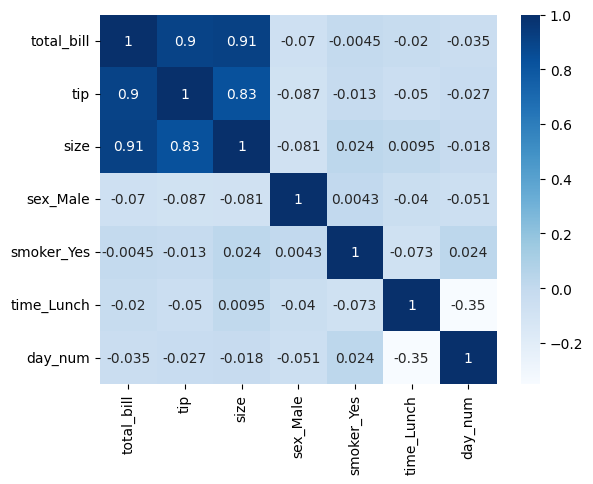

In [15]:
correlation_matrix = df_encoded.corr(method='pearson', numeric_only=False)
sb.heatmap(correlation_matrix, cmap="Blues", annot=True)

## Értelmezés:
Ahogy látható a "total_bill" és a "tip" és a "size" között pozitiv irányú, erős kapcsolat van. Tehát minél többen esznek annál nagyobb a számla és a borravaló is <br>
Mivel a teljes rendelés értéke erős korrelációt mutat a hagyott jatt értékével és mivel a túlzott korreláció torzíthatja az eredményeket így ebből elég csak az egyiket használnunk. <br>
A többi változó értéke kevésbé informatívak, szignifikánsak így ezek elhagyhatóak a modell kialakításában. 

# 3.Létrehozzuk a többváltozós Regressziós modellt a tip értékének becslésére

C:\Users\User\AppData\Local\Temp\ipykernel_5872\4012957116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["tip"])


<Axes: xlabel='tip', ylabel='Density'>

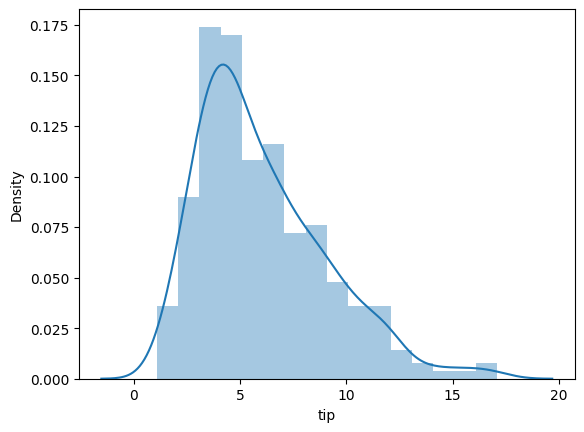

In [27]:
sb.distplot(df["tip"])

Bala ferde normális eloszlás

<Axes: xlabel='total_bill', ylabel='tip'>

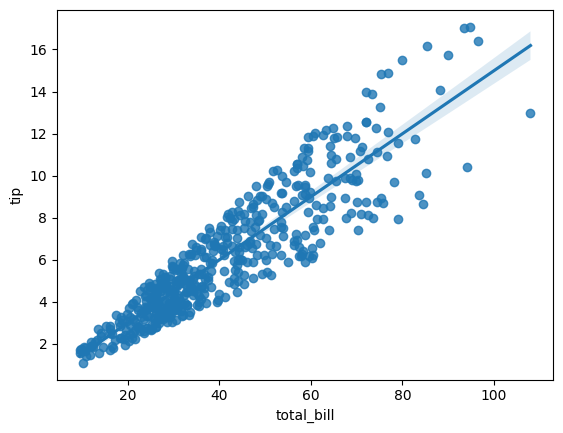

In [17]:
sb.regplot(x=df_encoded['total_bill'], y=df_encoded['tip'], scatter=True, fit_reg=True)

<Axes: xlabel='size', ylabel='tip'>

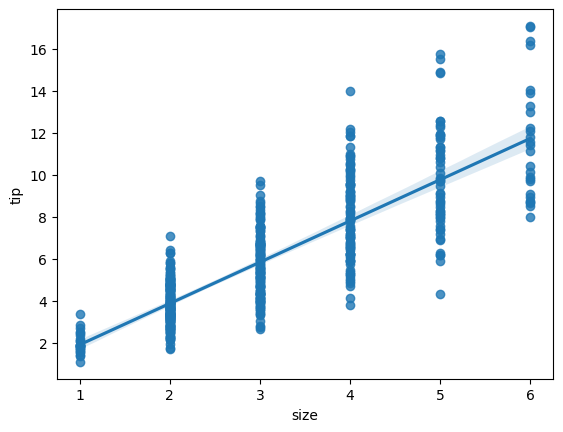

In [18]:
sb.regplot(x=df_encoded['size'], y=df_encoded['tip'], scatter=True, fit_reg=True)

<Axes: xlabel='time_Lunch', ylabel='tip'>

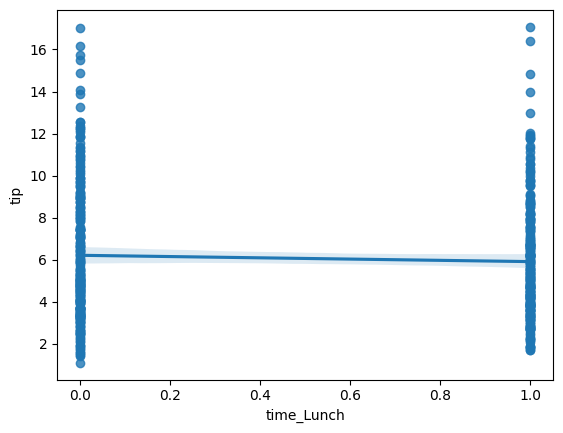

In [19]:
sb.regplot(x=df_encoded['time_Lunch'], y=df_encoded['tip'], scatter=True, fit_reg=True)

## 4.Elválasztjuk a teszt adatokat és a tanulási adatokat
70-30 arányban osztottam fel az tanító és tesztelő adataimat

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df_encoded[['total_bill', 'time_Lunch']]
y = df_encoded['tip']

X_teszt, X_tanito, y_teszt, y_tanito = train_test_split(X,y,train_size=0.3, random_state=100)
print(y_tanito.shape)
print(y_teszt.shape)

(350,)
(150,)


In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_tanito, y_tanito)
print('Intercept B0 eredménye: ',regr.intercept_)
list(zip(X, regr.coef_))

Intercept B0 eredménye:  0.19458051016704658


[('total_bill', np.float64(0.14769933939472746)),
 ('time_Lunch', np.float64(-0.2797418447853866))]

Ez azt jelenti, hogy a modell konstansa (Interceptje) 0.195, amit akkor adna a modell, ha a többi változó értéke 0 lenne. <br>
Az coefficient pedig azt mutatja meg, hogy az egyes magyarázó változók egységnyi változása milyen fajta (irányú és nagyságú) változást eedményez a jattban.

In [38]:
y_pred = regr.predict(X_teszt)
x_pred = regr.predict(X_tanito)
print("A teszt dataset predikciói: {}".format(y_pred))

A teszt dataset predikciói: [ 6.994068    5.16761727  7.60908735  3.67142296 14.17373289  5.2290609
  9.76106672  3.18490204  3.74615953  3.11400636  4.48908721  2.39175659
 12.48257545  8.24065043 11.29566286  5.86475815  2.2780281  11.50539592
  1.95958762  9.60450542  5.5200286  10.21539059  6.44226257 13.9034431
  8.31597709  6.71550634  3.73936466  7.98808456  3.662561    7.09450355
  3.3946351   3.86136501  6.80205886  4.40637558  8.17034484  3.95146161
 13.22018525  5.15137034  3.73582058 10.9057366   4.39514972  8.78477409
  9.16583839  7.02803885  8.58922087  4.80664079  3.68323891  5.49994078
  3.53553957  2.64048157  5.75398364  3.91364988  4.333116    4.16326176
  2.83928559  7.80995845  4.12574683  4.17064673  8.60251381 10.65612472
  1.8059803   2.64934353  8.57799501  1.69372881  4.03033235  8.26487241
  4.41228355  4.14051677  4.06371311  4.23504434  4.6905484   4.63146867
  4.66041844 10.54682721  4.91209741 12.14138998  3.74822662  4.53782799
  8.95462833  7.42535007 

In [40]:
reg_model_diff = pd.DataFrame({'Teszt igazi értéke': y_teszt, 'Megjósolt érték': y_pred})
reg_model_diff

,Teszt igazi értéke,Megjósolt érték
276,6.76,6.994068
223,4.66,5.167617
220,5.96,7.609087
67,3.54,3.671423
109,16.38,14.173733
...,...,...
343,5.53,5.511757
359,5.63,4.329572
323,4.79,4.096207
280,6.40,5.494033


Ahogy látható nem teljesen pontos a modellünk égy célzerű a modell hibáit kiszámolni

In [43]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = metrics.mean_absolute_error(y_teszt, y_pred)
print(f"Átlagos abszolút hiba mértéke: {mae}")
mse = metrics.mean_squared_error(y_teszt, y_pred)
print(f"Átlagos négyzetes hiba: {mse}") 
r2 = metrics.r2_score(y_teszt, y_pred)
print(f"Determinációs együttható (R²): {r2}")

Átlagos abszolút hiba mértéke: 1.02546032789263
Átlagos négyzetes hiba: 1.6440829102197299
Determinációs együttható (R²): 0.8441493580108019


A determinációs együtthatóból következik, hogy a modell majdnem tökéletesne magyaráz. A hibák mérték nem valami nagy de nem is kicsi mert majdnem egy pénzegységet tévedhet